# Ejercicio de Regresión 1 (Core)

Objetivo

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

Descripción del problema: Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

Instrucciones:

- Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
    - SqFt: Tamaño de la casa en pies cuadrados.
    - Bedrooms: Número de habitaciones.
    - Bathrooms: Número de baños.
    - price: Precio de venta de la casa.
- Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
- Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
- Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
- Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.
- Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
    - Tamaño: 2000 pies cuadrados
    - Habitaciones: 3
    - Baños: 2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/house-prices.csv', encoding='ISO-8859-1')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [22]:
df.dtypes.value_counts()

int64     6
object    2
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [24]:
df.drop_duplicates().head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


{'whiskers': [<matplotlib.lines.Line2D at 0x26ec6838e00>,
 'caps': [<matplotlib.lines.Line2D at 0x26ec68381a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ec5ff0dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ec6839760>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ec6839a90>],
 'means': []}

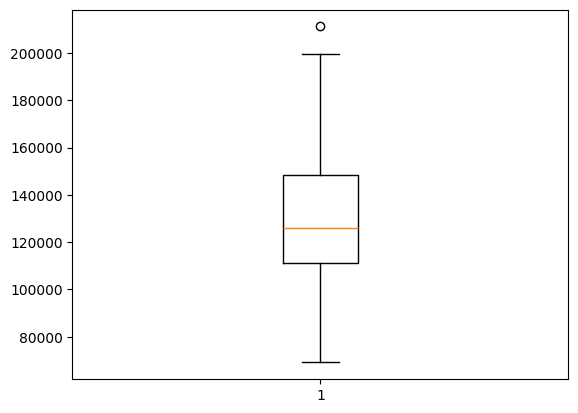

In [25]:
plt.boxplot(df['Price'])

In [26]:
df.query('Price > 200000')

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
103,104,211200,2440,4,3,3,Yes,West


In [27]:
df = df.query('Price < 200000')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('El R2 es:', r2)
print('El MSE es:', mse)

El R2 es: 0.826454056882266
El MSE es: 121900110.38659461
